In [ ]:
import json
import pandas as pd
import numpy as np
import os
from unidecode import unidecode # Pour enlever les accents


✅ Fichier de test créé avec succès !


Étape 1 : Chargement et Inspection brute
On charge le JSON et on regarde comment il est structuré. C'est souvent là qu'on comprend pourquoi c'est "complexe".

In [14]:
# 1. Chargement
json_path = 'data/data_2018.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# 2. Inspection
print("🔑 Les clés principales du JSON :", data.keys())
print("-" * 30)
print("Exemple d'une équipe brute :", data['teams'][0])
print("Exemple d'un groupe brut :", data['groups']['c']['name'])

🔑 Les clés principales du JSON : dict_keys(['stadiums', 'tvchannels', 'teams', 'groups', 'knockout'])
------------------------------
Exemple d'une équipe brute : {'id': 1, 'name': 'Russia', 'fifaCode': 'RUS', 'iso2': 'ru', 'flag': 'https://upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/900px-Flag_of_Russia.png', 'emoji': 'flag-ru', 'emojiString': '🇷🇺'}
Exemple d'un groupe brut : Group C


In [23]:
# Juste pour info, voici ce qu'il y a dedans
stadiums = pd.DataFrame(data['stadiums'])
display(stadiums.head())

,id,name,city,lat,lng,image
0,1,Luzhniki Stadium,Moscow,55.715765,37.551522,https://upload.wikimedia.org/wikipedia/commons...
1,2,Otkrytiye Arena,Moscow,55.817765,37.440363,https://upload.wikimedia.org/wikipedia/commons...
2,3,Krestovsky Stadium,Saint Petersburg,59.972740,30.221408,https://upload.wikimedia.org/wikipedia/commons...
3,4,Kaliningrad Stadium,Kaliningrad,54.698157,20.533859,https://upload.wikimedia.org/wikipedia/commons...
4,5,Kazan Arena,Kazan,55.820983,49.160966,https://upload.wikimedia.org/wikipedia/commons...


In [24]:
# Juste pour info, voici ce qu'il y a dedans
teams = pd.DataFrame(data['teams'])
display(teams.head())

,id,name,fifaCode,iso2,flag,emoji,emojiString
0,1,Russia,RUS,ru,https://upload.wikimedia.org/wikipedia/en/thum...,flag-ru,🇷🇺
1,2,Saudi Arabia,KSA,sa,https://upload.wikimedia.org/wikipedia/commons...,flag-sa,🇸🇦
2,3,Egypt,EGY,eg,https://upload.wikimedia.org/wikipedia/commons...,flag-eg,🇪🇬
3,4,Uruguay,URU,uy,https://upload.wikimedia.org/wikipedia/commons...,flag-uy,🇺🇾
4,5,Portugal,POR,pt,https://upload.wikimedia.org/wikipedia/commons...,flag-pt,🇵🇹


In [25]:
# Juste pour info, voici ce qu'il y a dedans
groups = pd.DataFrame(data['groups'])
display(groups.head())

,a,b,c,d,e,f,g,h
name,Group A,Group B,Group C,Group D,Group E,Group F,Group G,Group H
winner,4,6,9,15,17,23,25,31
runnerup,1,5,12,13,18,22,28,32
matches,"[{'name': 1, 'type': 'group', 'home_team': 1, ...","[{'name': 3, 'type': 'group', 'home_team': 5, ...","[{'name': 5, 'type': 'group', 'home_team': 9, ...","[{'name': 7, 'type': 'group', 'home_team': 13,...","[{'name': 9, 'type': 'group', 'home_team': 17,...","[{'name': 11, 'type': 'group', 'home_team': 21...","[{'name': 13, 'type': 'group', 'home_team': 25...","[{'name': 15, 'type': 'group', 'home_team': 29..."


In [26]:
# Juste pour info, voici ce qu'il y a dedans
tv_channels = pd.DataFrame(data['tvchannels'])
display(tv_channels.head())

,id,name,icon,country,iso2,lang
0,1,DR1,https://upload.wikimedia.org/wikipedia/commons...,Denmark,dk,[da]
1,2,TV2,https://upload.wikimedia.org/wikipedia/commons...,Denmark,dk,[da]
2,3,BBC UK,https://upload.wikimedia.org/wikipedia/commons...,UK,en,[en]
3,4,ITV UK,https://upload.wikimedia.org/wikipedia/en/9/92...,UK,en,[en]
4,5,ITV4 UK,https://upload.wikimedia.org/wikipedia/en/9/92...,UK,en,[en]


1. La règle du "Besoin Métier"

Dans un ETL, on ne garde pas tout. On garde seulement ce qui est utile pour l'analyse finale.
L'objectif du projet : Analyser les résultats, les scores et prédire les vainqueurs.

La question : Est-ce que savoir que le match a été diffusé sur BBC UK ou TF1 nous aide à savoir qui a gagné ? Non.
C'est ce qu'on appelle la sélection de données. Stocker des informations inutiles (comme les chaînes TV) alourdit la base de données et ralentit les calculs pour rien.

2. Les clés JSON : Gardé ou pas et	Pourquoi ?

teams	✅ Gardé	Indispensable pour avoir le nom des pays (Lookup).

stadiums	✅ Gardé	Utile pour avoir la Ville (city) demandée dans le livrable.

groups	✅ Gardé	Contient les matchs de poule (la donnée principale).

knockout	✅ Gardé	Contient les finales (la donnée principale).

tvchannels	❌ Rejeté	Information "cosmétique" sans impact sur le score du match.

In [27]:
# Regardons seulement les matchs du Groupe A (colonne 'a')
matches_groupe_a = data['groups']['a']['matches']

# Affichons le premier match de la liste
premier_match = matches_groupe_a[0]

print("🏟️ Voici à quoi ressemble UN match caché dans cette liste :")
print(premier_match)

🏟️ Voici à quoi ressemble UN match caché dans cette liste :
{'name': 1, 'type': 'group', 'home_team': 1, 'away_team': 2, 'home_result': 5, 'away_result': 0, 'date': '2018-06-14T18:00:00+03:00', 'stadium': 1, 'channels': [4, 6, 13, 17, 20, 22], 'finished': True, 'matchday': 1}


Étape 2 : Création des "Lookups" (Dictionnaires de correspondance)
On transforme les listes en dictionnaires pour pouvoir traduire les ID instantanément.

In [16]:
# MAPPING ÉQUIPES
# On veut : {9: "France", 15: "Croatia"}
teams_map = {t['id']: t['name'] for t in data['teams']}

print("🗺️ Dictionnaire des équipes (Extrait) :")
print(teams_map)

# MAPPING STADES (Pour avoir la Ville)
# On veut : {1: "Moscow"}
stadiums_map = {s['id']: s['city'] for s in data['stadiums']}

print("\n🏟️ Dictionnaire des villes (Extrait) :")
print(stadiums_map)

# Test manuel pour vérifier
print("-" * 30)
print(f"L'équipe ID 9 est : {teams_map.get(9)}")
print(f"Le stade ID 1 est à : {stadiums_map.get(1)}")

🗺️ Dictionnaire des équipes (Extrait) :
{1: 'Russia', 2: 'Saudi Arabia', 3: 'Egypt', 4: 'Uruguay', 5: 'Portugal', 6: 'Spain', 7: 'Morocco', 8: 'Iran', 9: 'France', 10: 'Australia', 11: 'Peru', 12: 'Denmark', 13: 'Argentina', 14: 'Iceland', 15: 'Croatia', 16: 'Nigeria', 17: 'Brazil', 18: 'Switzerland', 19: 'Costa Rica', 20: 'Serbia', 21: 'Germany', 22: 'Mexico', 23: 'Sweden', 24: 'South Korea', 25: 'Belgium', 26: 'Panama', 27: 'Tunisia', 28: 'England', 29: 'Poland', 30: 'Senegal', 31: 'Colombia', 32: 'Japan'}

🏟️ Dictionnaire des villes (Extrait) :
{1: 'Moscow', 2: 'Moscow', 3: 'Saint Petersburg', 4: 'Kaliningrad', 5: 'Kazan', 6: 'Nizhny Novgorod', 7: 'Samara', 8: 'Volgograd', 9: 'Saransk', 10: 'Rostov-on-Don', 11: 'Sochi', 12: 'Yekaterinburg'}
------------------------------
L'équipe ID 9 est : France
Le stade ID 1 est à : Moscow


Étape 3 : Boucle sur les Matchs de Poules (Groups)
On rentre dans la structure imbriquée groups -> a, b, c... -> matches.

In [17]:
matches_list = []

print("🔄 Début de l'extraction des Groupes...")

# data['groups'] est un dictionnaire (clés "a", "b", "c"...)
for group_letter, group_content in data['groups'].items():
    
    nom_groupe = group_content['name'] # ex: "Group C"
    liste_matchs = group_content['matches']
    
    print(f"   -> Traitement du {nom_groupe} ({len(liste_matchs)} matchs)")
    
    for m in liste_matchs:
        # C'est ICI qu'on fait la traduction ID -> Nom
        match_propre = {
            'home_team': teams_map.get(m['home_team']), # Traduction !
            'away_team': teams_map.get(m['away_team']), # Traduction !
            'home_result': m['home_result'],
            'away_result': m['away_result'],
            'date': m['date'],
            'city': stadiums_map.get(m['stadium']),     # Traduction !
            'round': nom_groupe,
            'edition': 2018
        }
        matches_list.append(match_propre)

print(f"✅ Nombre de matchs récupérés : {len(matches_list)}")
print("Dernier match ajouté :", matches_list[-1])

🔄 Début de l'extraction des Groupes...
   -> Traitement du Group A (6 matchs)
   -> Traitement du Group B (6 matchs)
   -> Traitement du Group C (6 matchs)
   -> Traitement du Group D (6 matchs)
   -> Traitement du Group E (6 matchs)
   -> Traitement du Group F (6 matchs)
   -> Traitement du Group G (6 matchs)
   -> Traitement du Group H (6 matchs)
✅ Nombre de matchs récupérés : 48
Dernier match ajouté : {'home_team': 'Senegal', 'away_team': 'Colombia', 'home_result': 0, 'away_result': 1, 'date': '2018-06-28T18:00:00+04:00', 'city': 'Samara', 'round': 'Group H', 'edition': 2018}


Étape 4 : Boucle sur les Phases Finales (Knockout)
Même logique, mais la clé s'appelle knockout.

In [18]:
print("🔄 Début de l'extraction des Phases Finales...")

# data['knockout'] contient "round_16", "round_8", "round_2" (finale), etc.
for stage_key, stage_content in data['knockout'].items():
    
    nom_phase = stage_content['name'] # ex: "Final"
    liste_matchs = stage_content['matches']
    
    print(f"   -> Traitement de : {nom_phase}")
    
    for m in liste_matchs:
        match_propre = {
            'home_team': teams_map.get(m['home_team']),
            'away_team': teams_map.get(m['away_team']),
            'home_result': m['home_result'],
            'away_result': m['away_result'],
            'date': m['date'],
            'city': stadiums_map.get(m['stadium']),
            'round': nom_phase,
            'edition': 2018
        }
        matches_list.append(match_propre)

print(f"✅ Total cumulé des matchs : {len(matches_list)}")

🔄 Début de l'extraction des Phases Finales...
   -> Traitement de : Round of 16
   -> Traitement de : Quarter-finals
   -> Traitement de : Semi-finals
   -> Traitement de : Third place play-off
   -> Traitement de : Final
✅ Total cumulé des matchs : 64


Étape 5 : Création du DataFrame et Nettoyage Final
On transforme la liste de dictionnaires en tableau propre.

In [20]:
# Conversion en DataFrame Pandas
df = pd.DataFrame(matches_list)

print("📊 DataFrame Brut (Regarde la colonne date) :")
display(df.head()) # 'display' fonctionne dans les notebooks, sinon utilise print()

# Nettoyage de la date
# Format actuel : "2018-06-16T13:00:00+03:00" (Trop compliqué)
# Format voulu : "2018-06-16" (Date simple)



📊 DataFrame Brut (Regarde la colonne date) :


,home_team,away_team,home_result,away_result,date,city,round,edition
0,Russia,Saudi Arabia,5,0,2018-06-14T18:00:00+03:00,Moscow,Group A,2018
1,Egypt,Uruguay,0,1,2018-06-15T17:00:00+05:00,Yekaterinburg,Group A,2018
2,Russia,Egypt,3,1,2018-06-19T21:00:00+03:00,Saint Petersburg,Group A,2018
3,Uruguay,Saudi Arabia,1,0,2018-06-20T18:00:00+03:00,Rostov-on-Don,Group A,2018
4,Uruguay,Russia,3,0,2018-06-25T18:00:00+04:00,Samara,Group A,2018


In [30]:
import json
import pandas as pd

# 1. Chargement du fichier
with open('data/data_2018.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 2. Extraction directe
# La clé 'teams' contient déjà une liste parfaite, Pandas peut la lire directement
df_countries = pd.DataFrame(data['teams'])

# 3. Sélection des colonnes utiles pour ton projet
# On ne garde pas 'emoji' ou 'emojiString', c'est inutile pour la base de données
df_countries = df_countries[['id', 'name', 'fifaCode', 'iso2', 'flag']]

# 4. Renommage pour que ce soit propre en base (Optionnel)
df_countries = df_countries.rename(columns={
    'id': 'team_id',
    'name': 'team_name',
    'fifaCode': 'fifa_code',
    'iso2': 'iso_code'
})

print(f"🌍 Nombre de pays qualifiés en 2018 : {len(df_countries)}")
display(df_countries)

🌍 Nombre de pays qualifiés en 2018 : 32


,team_id,team_name,fifa_code,iso_code,flag
0,1,Russia,RUS,ru,https://upload.wikimedia.org/wikipedia/en/thum...
1,2,Saudi Arabia,KSA,sa,https://upload.wikimedia.org/wikipedia/commons...
2,3,Egypt,EGY,eg,https://upload.wikimedia.org/wikipedia/commons...
3,4,Uruguay,URU,uy,https://upload.wikimedia.org/wikipedia/commons...
4,5,Portugal,POR,pt,https://upload.wikimedia.org/wikipedia/commons...
5,6,Spain,ESP,es,https://upload.wikimedia.org/wikipedia/en/thum...
6,7,Morocco,MAR,ma,https://upload.wikimedia.org/wikipedia/commons...
7,8,Iran,IRN,ir,https://upload.wikimedia.org/wikipedia/commons...
8,9,France,FRA,fr,https://upload.wikimedia.org/wikipedia/en/thum...
9,10,Australia,AUS,au,https://upload.wikimedia.org/wikipedia/commons...


Vérification "Qualité de données"

In [28]:
# Vérifier s'il y a des valeurs manquantes (ex: un ID d'équipe qu'on n'aurait pas trouvé dans le mapping)
print("🔍 Vérification des valeurs nulles :")
print(df.isnull().sum())

if df.isnull().values.any():
    print("⚠️ ATTENTION : Il y a des données manquantes (peut-être un ID inconnu dans le JSON ?)")
else:
    print("✅ Tout est propre !")

🔍 Vérification des valeurs nulles :
home_team      0
away_team      0
home_result    0
away_result    0
date           0
city           0
round          0
edition        0
dtype: int64
✅ Tout est propre !


In [31]:
# On change les options d'affichage de Pandas pour voir illimité
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(f"📋 Affichage complet des {len(df)} matchs :")
display(df) 
# Si display() ne marche pas (ex: hors Jupyter), utilise : print(df.to_string())

📋 Affichage complet des 64 matchs :


,home_team,away_team,home_result,away_result,date,city,round,edition
0,Russia,Saudi Arabia,5,0,2018-06-14T18:00:00+03:00,Moscow,Group A,2018
1,Egypt,Uruguay,0,1,2018-06-15T17:00:00+05:00,Yekaterinburg,Group A,2018
2,Russia,Egypt,3,1,2018-06-19T21:00:00+03:00,Saint Petersburg,Group A,2018
3,Uruguay,Saudi Arabia,1,0,2018-06-20T18:00:00+03:00,Rostov-on-Don,Group A,2018
4,Uruguay,Russia,3,0,2018-06-25T18:00:00+04:00,Samara,Group A,2018
5,Saudi Arabia,Egypt,2,1,2018-06-25T17:00:00+03:00,Volgograd,Group A,2018
6,Portugal,Spain,3,3,2018-06-15T21:00:00+03:00,Sochi,Group B,2018
7,Morocco,Iran,0,1,2018-06-15T18:00:00+03:00,Saint Petersburg,Group B,2018
8,Portugal,Morocco,1,0,2018-06-20T15:00:00+03:00,Moscow,Group B,2018
9,Iran,Spain,0,1,2018-06-20T21:00:00+03:00,Kazan,Group B,2018


**ANALYSE DES PERFORMANCES**

In [ ]:
import duckdb
import pandas as pd
import os

# Vérification pour être sûr (Optionnel mais rassurant)
print(f"📂 Je suis dans : {os.getcwd()}")

# Le chemin relatif
db_path = "../db/db.duckdb"

try:
    print(f"🔌 Connexion à : {db_path}")
    con = duckdb.connect(db_path, read_only=True)
    print("✅ Connexion réussie !")
    
    # Test
    df = con.execute("SELECT * FROM v_matches_flat LIMIT 5").df()
    display(df)

except Exception as e:
    print(f"❌ Erreur : {e}")
finally:
    if 'con' in locals() and con:
        con.close()

📂 Je suis dans : /Users/aouyadouamba/Documents/FORMATION_SIMPLON/BRIEFS/Brief-2-ETL-donn-es-footballistiques-Bean-Kings/etl
🔌 Connexion à : ../db/db.duckdb
✅ Connexion réussie !


,match_id,match_date,day_,month_,year_,stage,city,home_team,home_goals,home_result,away_team,away_goals,away_result
0,1,1930-07-13 15:00:00,13,7,1930,group,montevideo,united states,3,winner,belgium,0,loser
1,600,1930-07-13 15:00:00,13,7,1930,group,montevideo,france,4,winner,mexico,1,loser
2,2,1930-07-14 12:45:00,14,7,1930,group,montevideo,yugoslavia,2,winner,brazil,1,loser
3,719,1930-07-14 14:50:00,14,7,1930,group,montevideo,romania,3,winner,peru,1,loser
4,833,1930-07-15 16:00:00,15,7,1930,group,montevideo,argentina,1,winner,france,0,loser


In [22]:
import duckdb
import pandas as pd
import os

# Chemin relatif (puisque ça marche chez toi)
db_path = "../db/db.duckdb"
con = None

try:
    print(f"🔌 Connexion à : {db_path}")
    # Connexion en lecture seule
    con = duckdb.connect(db_path, read_only=True)
    
    # --- LA REQUÊTE POUR TOUT RÉCUPÉRER ---
    # On enlève le "LIMIT 5"
    # On ajoute un tri par date pour que ce soit propre
    query = "SELECT * FROM v_matches_flat ORDER BY match_date ASC"
    
    print("⏳ Chargement de toutes les données...")
    df = con.execute(query).df()
    
    # Vérification
    print(f"✅ Chargement réussi !")
    print(f"📊 Dimensions du DataFrame : {df.shape[0]} lignes et {df.shape[1]} colonnes.")
    
    # Affichage des premières et dernières lignes pour vérifier 1930 et 2022
    display(df.head(3))
    display(df.tail(3))

except Exception as e:
    print(f"❌ Erreur : {e}")

finally:
    if con:
        con.close()
        print("🔒 Connexion fermée.")

🔌 Connexion à : ../db/db.duckdb
⏳ Chargement de toutes les données...
✅ Chargement réussi !
📊 Dimensions du DataFrame : 964 lignes et 13 colonnes.


,match_id,match_date,day_,month_,year_,stage,city,home_team,home_goals,home_result,away_team,away_goals,away_result
0,1,1930-07-13 15:00:00,13,7,1930,group,montevideo,united states,3,winner,belgium,0,loser
1,600,1930-07-13 15:00:00,13,7,1930,group,montevideo,france,4,winner,mexico,1,loser
2,2,1930-07-14 12:45:00,14,7,1930,group,montevideo,yugoslavia,2,winner,brazil,1,loser


,match_id,match_date,day_,month_,year_,stage,city,home_team,home_goals,home_result,away_team,away_goals,away_result
961,354,2022-12-14 22:00:00,14,12,2022,semi-final,al khor,france,2,win,morocco,0,loss
962,250,2022-12-17 18:00:00,17,12,2022,play-off for third place,doha,croatia,2,win,morocco,1,loss
963,832,2022-12-18 18:00:00,18,12,2022,final,lusail,argentina,3,draw,france,3,draw


🔒 Connexion fermée.


🛠 Étape 0 : Préparation & Enrichissement des données.
On ajoute des colonnes calculées nécessaires pour les graphiques (Vainqueur, Écart de buts, Total buts).

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration du style des graphiques
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Calcul du total de buts par match
df['total_goals'] = df['home_goals'] + df['away_goals']

# 2. Calcul de l'écart de buts (Valeur absolue)
df['goal_diff'] = abs(df['home_goals'] - df['away_goals'])

# 3. Création d'une colonne "Vainqueur" (Nom de l'équipe)
# On utilise numpy.select pour aller vite
conditions = [
    (df['home_result'] == 'winner'),
    (df['away_result'] == 'winner')
]
choices = [df['home_team'], df['away_team']]
df['winner_team'] = np.select(conditions, choices, default='Draw')

print("✅ Données enrichies ! Prêt pour les graphiques.")
display(df[['year_', 'home_team', 'away_team', 'winner_team', 'total_goals']].head())

✅ Données enrichies ! Prêt pour les graphiques.


,year_,home_team,away_team,winner_team,total_goals
0,1930,united states,belgium,united states,3
1,1930,france,mexico,france,5
2,1930,yugoslavia,brazil,yugoslavia,3
3,1930,romania,peru,romania,4
4,1930,argentina,france,argentina,1


📊 Axe 1 : L'évolution Temporelle

KPI 1 : Nombre total de buts par Coupe du Monde

Ce graphique montre une tendance générale à la hausse du nombre total de buts au fil du temps. Cette augmentation est principalement due à l'élargissement du tournoi (plus d'équipes et donc plus de matchs). Les pics récents (1998, 2014, 2022) correspondent aux formats à 32 équipes avec 64 matchs au total.

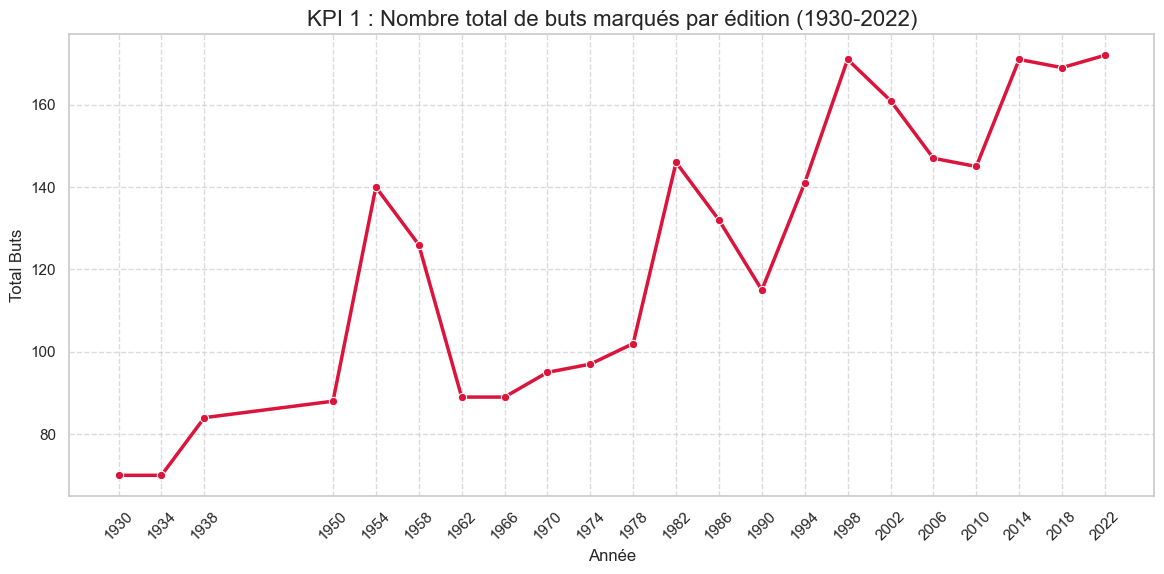

In [24]:
goals_by_year = df.groupby('year_')['total_goals'].sum().reset_index()

plt.figure(figsize=(14, 6))
# Lineplot avec des points (markers)
sns.lineplot(data=goals_by_year, x='year_', y='total_goals', marker='o', linewidth=2.5, color='crimson')

plt.title("KPI 1 : Nombre total de buts marqués par édition (1930-2022)", fontsize=16)
plt.xlabel("Année")
plt.ylabel("Total Buts")
plt.xticks(goals_by_year['year_'].unique(), rotation=45) # Affiche toutes les années
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

KPI 2 : Moyenne de buts par match

Contrairement au total de buts, la moyenne a drastiquement chuté après les années 1950. Le pic historique de 1954 (plus de 5 buts par match) reflète une époque de jeu très offensive. Depuis les années 1960, la moyenne s'est stabilisée entre 2,2 et 3 buts par match, illustrant une professionnalisation de la défense et un enjeu tactique plus serré.


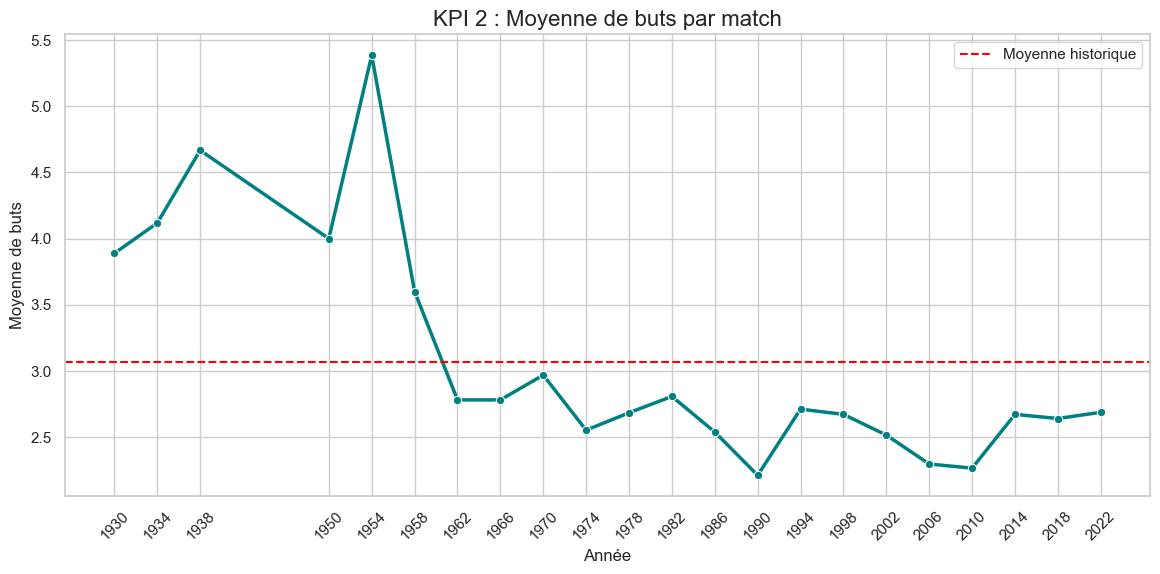

In [25]:
avg_goals = df.groupby('year_')['total_goals'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_goals, x='year_', y='total_goals', marker='o', color='teal', linewidth=2.5)
plt.axhline(y=avg_goals['total_goals'].mean(), color='red', linestyle='--', label='Moyenne historique')

plt.title("KPI 2 : Moyenne de buts par match", fontsize=16)
plt.xlabel("Année")
plt.ylabel("Moyenne de buts")
plt.xticks(avg_goals['year_'].unique(), rotation=45)
plt.legend()
plt.show()

🏆 Axe 2 : Les Performances des Équipes

KPI 3 : Top 10 des Pays avec le plus de Victoires

Qui domine l'histoire du foot ?

Ce classement illustre la domination historique de certaines nations. Le Brésil caracole en tête avec plus de 70 victoires, suivi par l'Italie, l'Argentine et l'Allemagne (séparée ici en "West Germany" et "Germany"). Cela souligne la régularité de ces "grandes nations" du football à travers les décennies.

/var/folders/4_/cb0dgr6d07d_36m06pf2rqjr0000gn/T/ipykernel_54305/3130162782.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_winners, x='Wins', y='Team', palette='viridis')


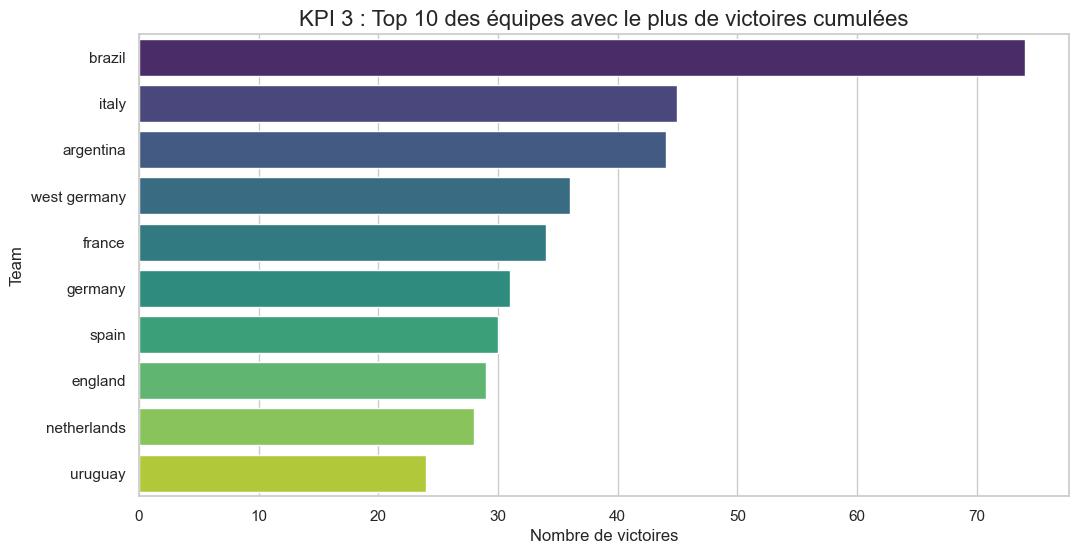

In [26]:
# On filtre les matchs nuls pour ne garder que les victoires
top_winners = df[df['winner_team'] != 'Draw']['winner_team'].value_counts().head(10).reset_index()
top_winners.columns = ['Team', 'Wins']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_winners, x='Wins', y='Team', palette='viridis')
plt.title("KPI 3 : Top 10 des équipes avec le plus de victoires cumulées", fontsize=16)
plt.xlabel("Nombre de victoires")
plt.show()

KPI 4 : Top 10 des "Meilleures Attaques" (Buts marqués)

On additionne les buts marqués quand l'équipe est à domicile et à l'extérieur.

Sans surprise, ce graphique est corrélé au nombre de victoires. Le Brésil est la nation la plus prolifique de l'histoire (plus de 230 buts). On note la présence de nations historiques comme la France, l'Argentine et l'Allemagne, qui ont participé à de nombreuses phases finales et sont allées loin dans la compétition.

/var/folders/4_/cb0dgr6d07d_36m06pf2rqjr0000gn/T/ipykernel_54305/2083787889.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_scorers, x='Team', y='Goals', palette='magma')


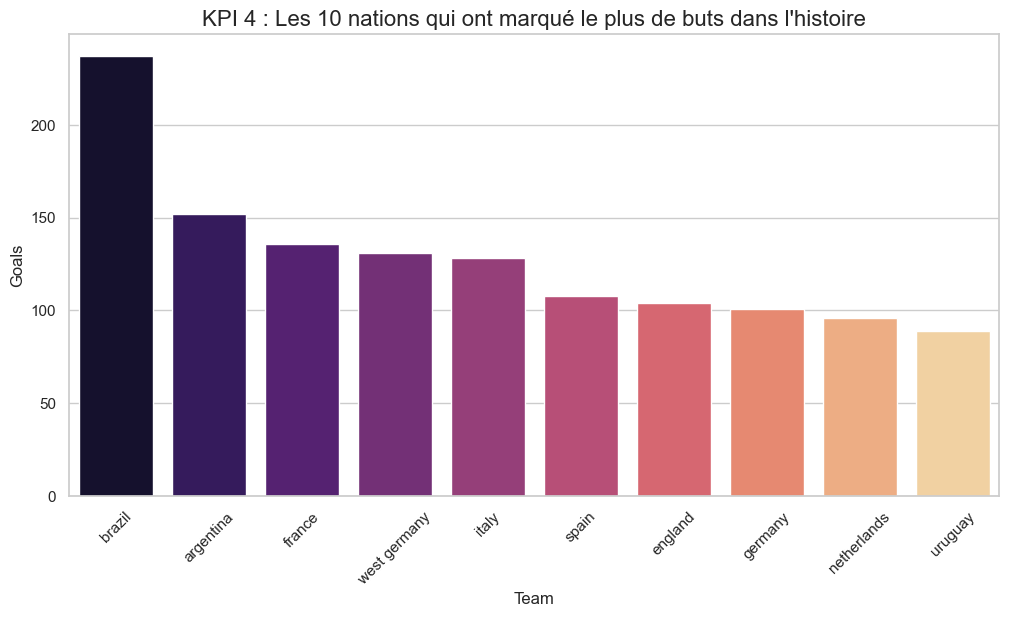

In [27]:
# Agrégation domicile
home_g = df.groupby('home_team')['home_goals'].sum().reset_index().rename(columns={'home_team':'Team', 'home_goals':'Goals'})
# Agrégation extérieur
away_g = df.groupby('away_team')['away_goals'].sum().reset_index().rename(columns={'away_team':'Team', 'away_goals':'Goals'})

# Fusion et Somme
total_scoring = pd.concat([home_g, away_g]).groupby('Team')['Goals'].sum().reset_index()
top_scorers = total_scoring.sort_values('Goals', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_scorers, x='Team', y='Goals', palette='magma')
plt.title("KPI 4 : Les 10 nations qui ont marqué le plus de buts dans l'histoire", fontsize=16)
plt.xticks(rotation=45)
plt.show()

⚽ Axe 3 : Analyse des Matchs

KPI 5 : L'avantage du terrain (Domicile vs Extérieur)

Est-ce que l'équipe affichée en premier ("Home") gagne plus souvent ?

In [ ]:
res_counts = df['home_result'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(res_counts, labels=res_counts.index, autopct='%1.1f%%', 
        colors=['#66b3ff', '#ff9999', '#99ff99'], startangle=90, explode=(0.05, 0, 0))
plt.title("KPI 5 : Répartition des résultats (Vue Équipe 1 / Domicile)", fontsize=16)
plt.show()

KPI 6 : Compétitivité (Distribution des écarts de buts)

Y a-t-il beaucoup de matchs serrés ou des scores fleuves ?

Ce graphique mesure l'équilibre des matchs. L'écart le plus fréquent est de 1 but, suivi de près par les matchs nuls (écart de 0) et les victoires par 2 buts d'écart. Cela montre que la majorité des matchs de Coupe du Monde sont disputés et compétitifs. Les "scores fleuves" (écart > 5) sont extrêmement rares.


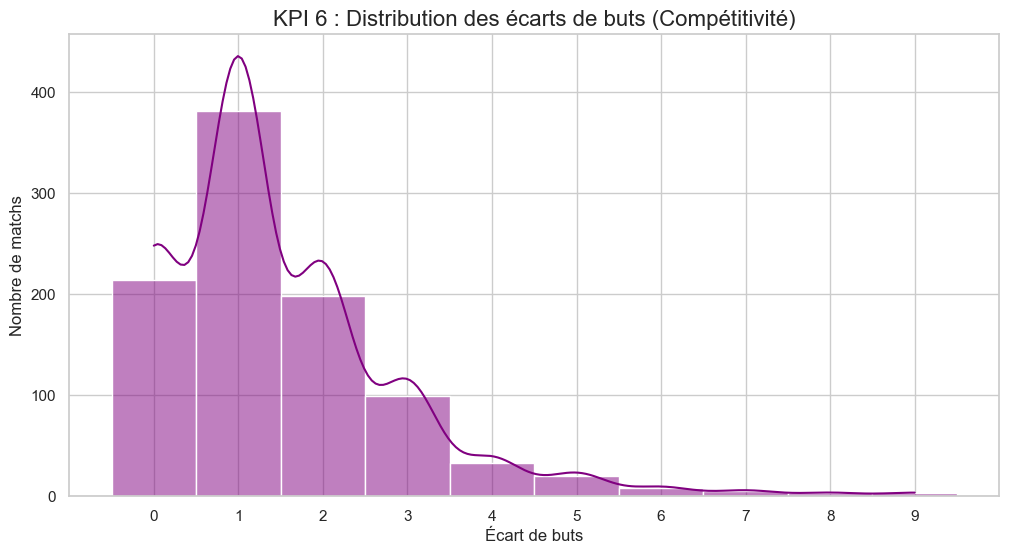

In [29]:
plt.figure(figsize=(12, 6))
# Un histogramme discret pour voir combien de matchs finissent avec 1 but d'écart, 2 buts, etc.
sns.histplot(data=df, x='goal_diff', discrete=True, color='purple', kde=True)

plt.title("KPI 6 : Distribution des écarts de buts (Compétitivité)", fontsize=16)
plt.xlabel("Écart de buts")
plt.ylabel("Nombre de matchs")
plt.xticks(range(0, 10)) # Écarts de 0 à 9 buts
plt.show()

KPI 7 : Les matchs les plus spectaculaires

Le tableau des records.

In [30]:
print("KPI 7 : Les 5 matchs avec le plus de buts de l'histoire :")
# On trie par total de buts décroissant
spectacular_matches = df.sort_values('total_goals', ascending=False).head(5)
display(spectacular_matches[['year_', 'stage', 'home_team', 'away_team', 'total_goals']])

KPI 7 : Les 5 matchs avec le plus de buts de l'histoire :


,year_,stage,home_team,away_team,total_goals
94,1954,quarter-final,austria,switzerland,12
312,1982,group,hungary,el salvador,11
40,1938,round of 16,brazil,poland,11
89,1954,group,hungary,west germany,11
106,1958,group,france,paraguay,10


🌍 Axe 4 : Structure & Corrélations

**KPI 8** : Expansion de la Coupe du Monde

Combien de pays participent à chaque édition ?

Ce diagramme en barres montre les phases d'expansion décidées par la FIFA :

 - **1930-1978** : Format stabilisé autour de 16 équipes (avec quelques variations au début).

 - **1982** : Passage à 24 équipes.

 - **1998-2022** : Passage à 32 équipes, reflétant la mondialisation du football.


/var/folders/4_/cb0dgr6d07d_36m06pf2rqjr0000gn/T/ipykernel_54305/1470462113.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  teams_per_year = df.groupby('year_').apply(


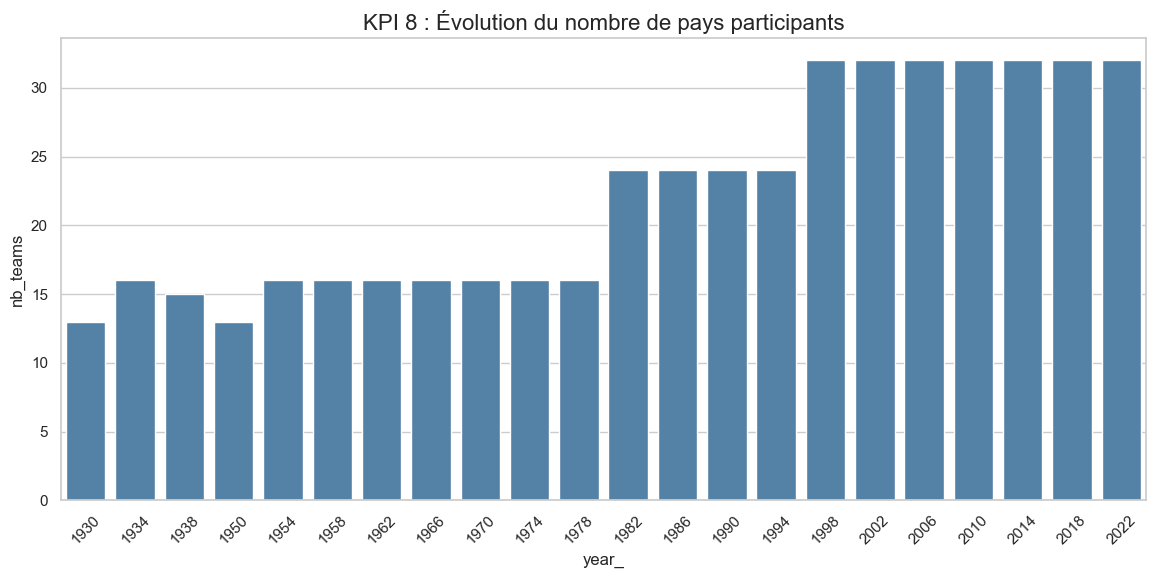

In [31]:
# On compte les équipes uniques par année
teams_per_year = df.groupby('year_').apply(
    lambda x: len(set(x['home_team']).union(set(x['away_team'])))
).reset_index(name='nb_teams')

plt.figure(figsize=(14, 6))
sns.barplot(data=teams_per_year, x='year_', y='nb_teams', color='steelblue')
plt.title("KPI 8 : Évolution du nombre de pays participants", fontsize=16)
plt.xticks(rotation=45)
plt.show()

KPI 9 : La pression de l'enjeu (Buts par phase)

Marque-t-on moins en finale qu'en phase de poule ?

Cette "boîte à moustaches" montre que le nombre de buts reste assez homogène selon les étapes. Toutefois :

 - Les finales ont une médiane légèrement plus élevée (autour de 4 buts récemment), souvent dû à des scores spectaculaires.
 
 - Les phases de groupes et les quarts de finale présentent des valeurs aberrantes (points isolés en haut), indiquant des matchs exceptionnels avec plus de 10 buts.


/var/folders/4_/cb0dgr6d07d_36m06pf2rqjr0000gn/T/ipykernel_54305/1217712677.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='stage', y='total_goals', order=main_stages, palette="Set3")


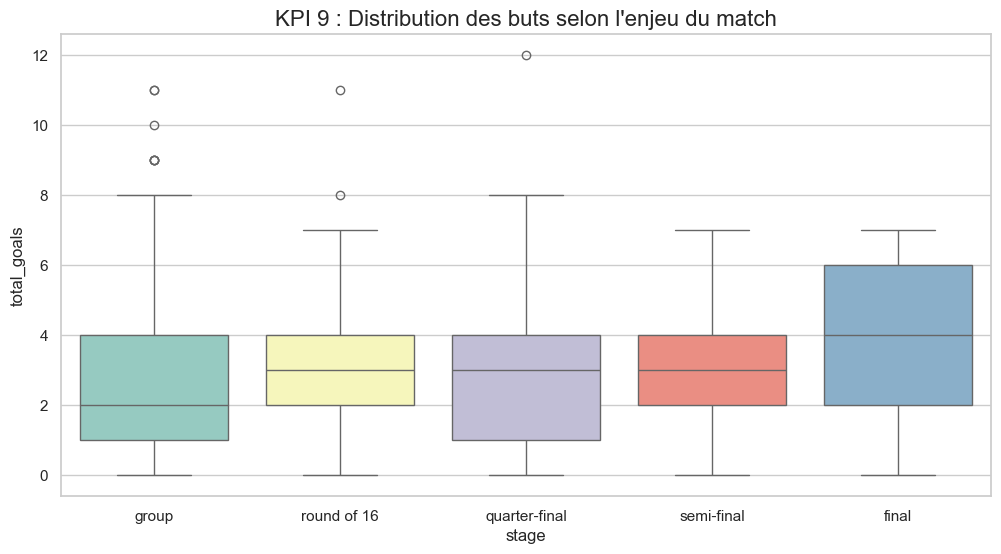

In [32]:
# On filtre pour garder les étapes principales et ordonner l'axe X
main_stages = ['group', 'round of 16', 'quarter-final', 'semi-final', 'final']
df_filtered = df[df['stage'].isin(main_stages)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='stage', y='total_goals', order=main_stages, palette="Set3")
plt.title("KPI 9 : Distribution des buts selon l'enjeu du match", fontsize=16)
plt.show()

**KPI 10** : Matrice de Corrélation

Analyse statistique avancée.

Cet outil statistique montre comment les variables sont liées :

 - Il y a une forte corrélation **(0,84)** entre les buts de l'équipe à domicile et le total de buts.

 - Une corrélation négative **(-0,34)** entre l'année et les buts suggère que, statistiquement, on marquait un peu plus de buts dans les anciennes éditions que dans les plus récentes.

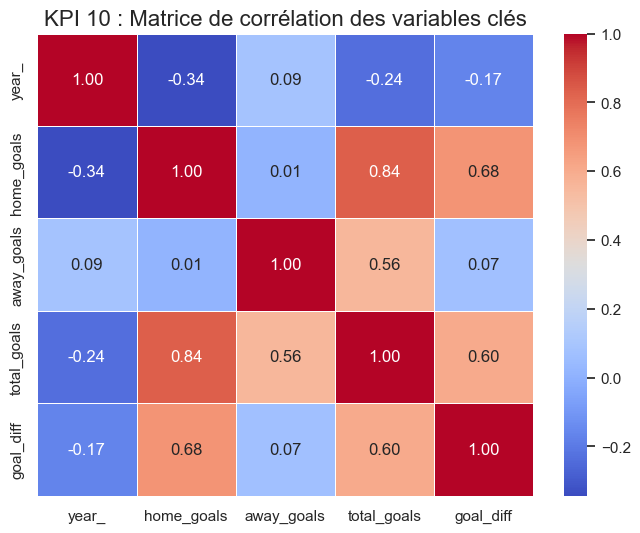

In [33]:
# On sélectionne les colonnes numériques pertinentes
corr_cols = ['year_', 'home_goals', 'away_goals', 'total_goals', 'goal_diff']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("KPI 10 : Matrice de corrélation des variables clés", fontsize=16)
plt.show()